## **KD Tree**
![KD Tree](https://www.baeldung.com/wp-content/uploads/sites/4/2023/03/kdtree.png)

## **Ball Tree**
![KD Tree](https://miro.medium.com/v2/resize:fit:828/format:webp/1*gvnWNYDnzyVgElxiG6mzHg.png)

# **Predictive Analysis on Diabetes using KNN**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path='/content/diabetes.csv'

In [6]:
df=pd.DataFrame(pd.read_csv(path))
display(df.head())
display(df.tail())

# 1-- has diabetes
# 0-- no diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.shape

(768, 9)

In [10]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# blood pressure, skin thickness, insulin can not be 0 for a living person

df.head(30) # there are some 0s in columns which does not make sense. we need to replace it

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   
20            3      126             88             41      235  39.3   
21            8       99             84              0        0  35.4   
22            7      196             90              0        0  39.8   
23            9      119             80             35        0  29.0   
24           11      143             94             33      146  36.6   
25           10      125             70             26      115  31.1   
26            7      147             76              0        0  39.4   
27            1       97             66             15      140  23.2   
28           13      145             82             19      110  22.2   
29            5      117             92              0        0  34.1   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1  
20                     0.704   27        0  
21                     0.388   50        0  
22                     0.451   41        1  
23                     0.263   29        1  
24                     0.254   51        1  
25                     0.205   41        1  
26                     0.257   43        1  
27                     0.487   22        0  
28                     0.245   57        0  
29                     0.337   38        0

<Figure size 800x600 with 0 Axes>

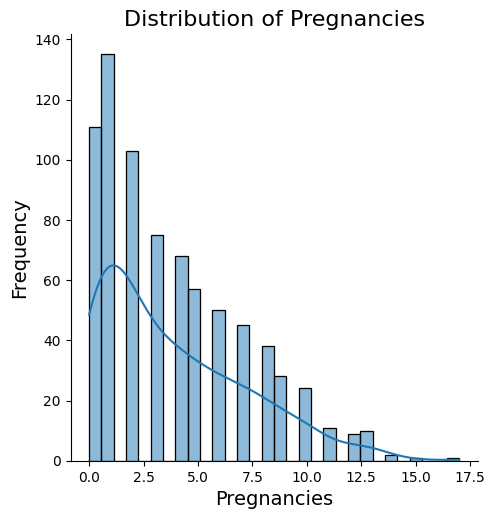

<Figure size 800x600 with 0 Axes>

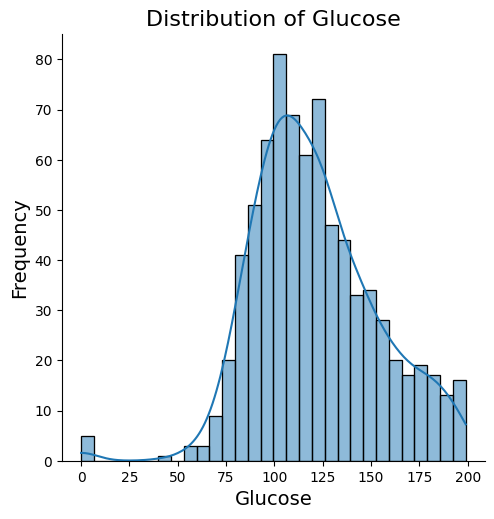

<Figure size 800x600 with 0 Axes>

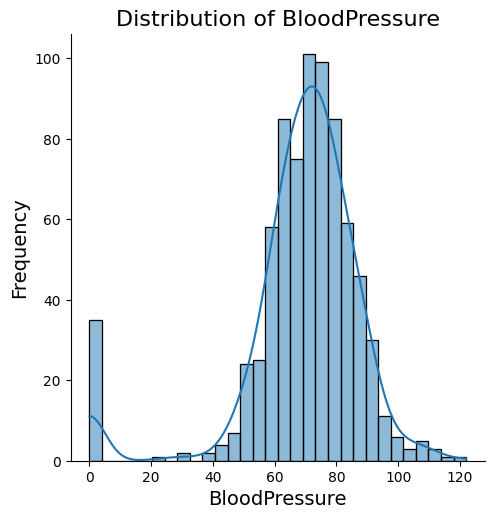

<Figure size 800x600 with 0 Axes>

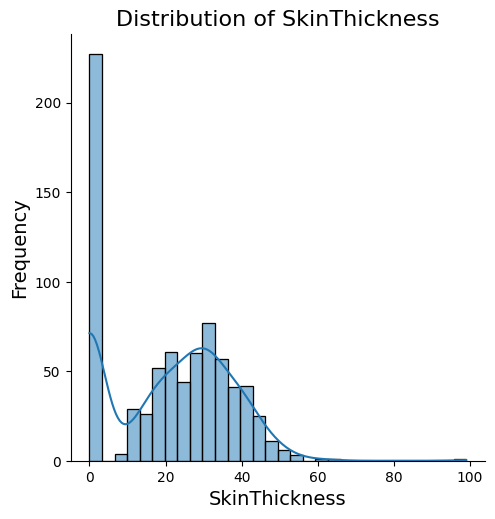

<Figure size 800x600 with 0 Axes>

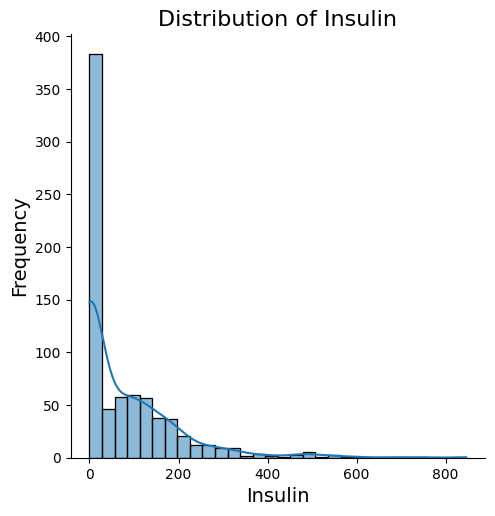

<Figure size 800x600 with 0 Axes>

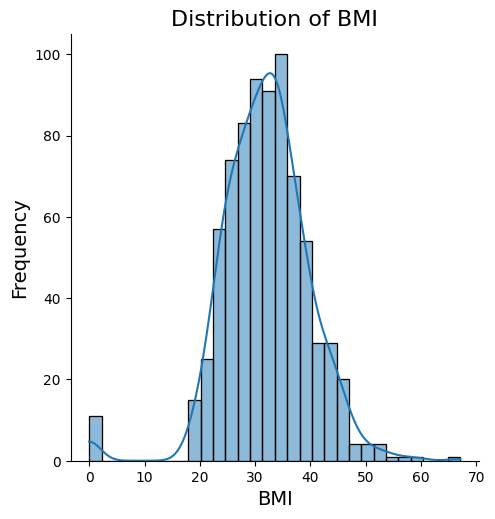

<Figure size 800x600 with 0 Axes>

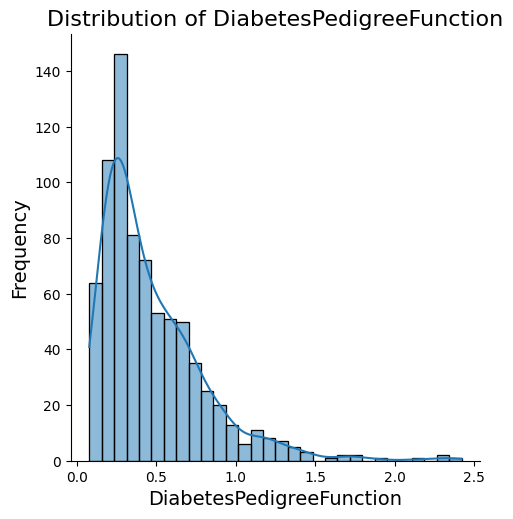

<Figure size 800x600 with 0 Axes>

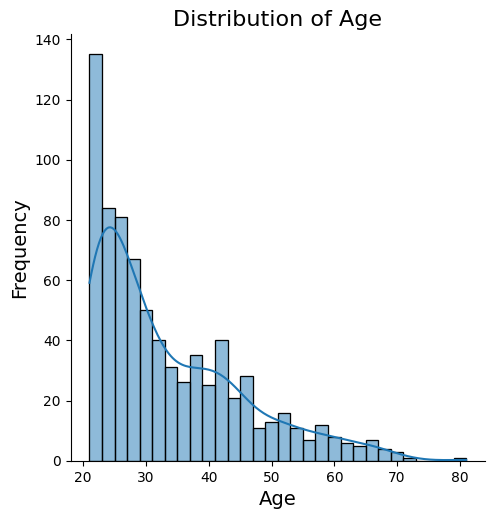

<Figure size 800x600 with 0 Axes>

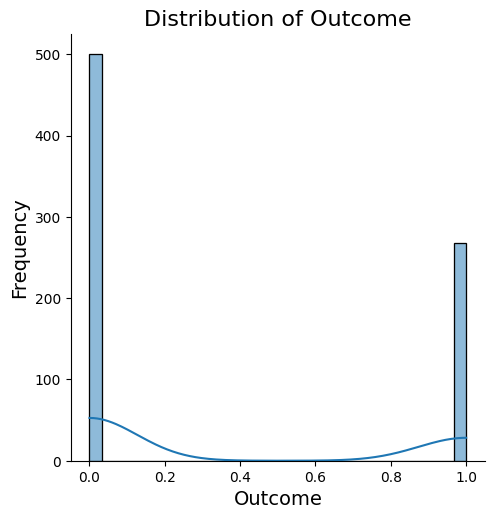

In [13]:
# let's do the data imputation

# let's change them from 0 to a value by mean , median or mode. This can be determined by the skewness of distribution (non symmetric (has skewness)-- has outliers, symmetric(no skewness)-- no outliers)
# mean is not a measure for unsymmetric data. it is affected by outliers as the distribution is non symmetric
# median is more robust to liers
# mode is for categorical data

# mean and median is for numeric data
# mode is for categorical data


# let's plot the distribution of columns
for i in df.columns:
   plt.figure(figsize=(8, 6))
   sns.displot(df[i], kde=True, bins=30)  # kde=True adds a smooth curve for density estimation
   plt.title(f"Distribution of {i}", fontsize=16)
   plt.xlabel(i, fontsize=14)
   plt.ylabel("Frequency", fontsize=14)
   plt.show()

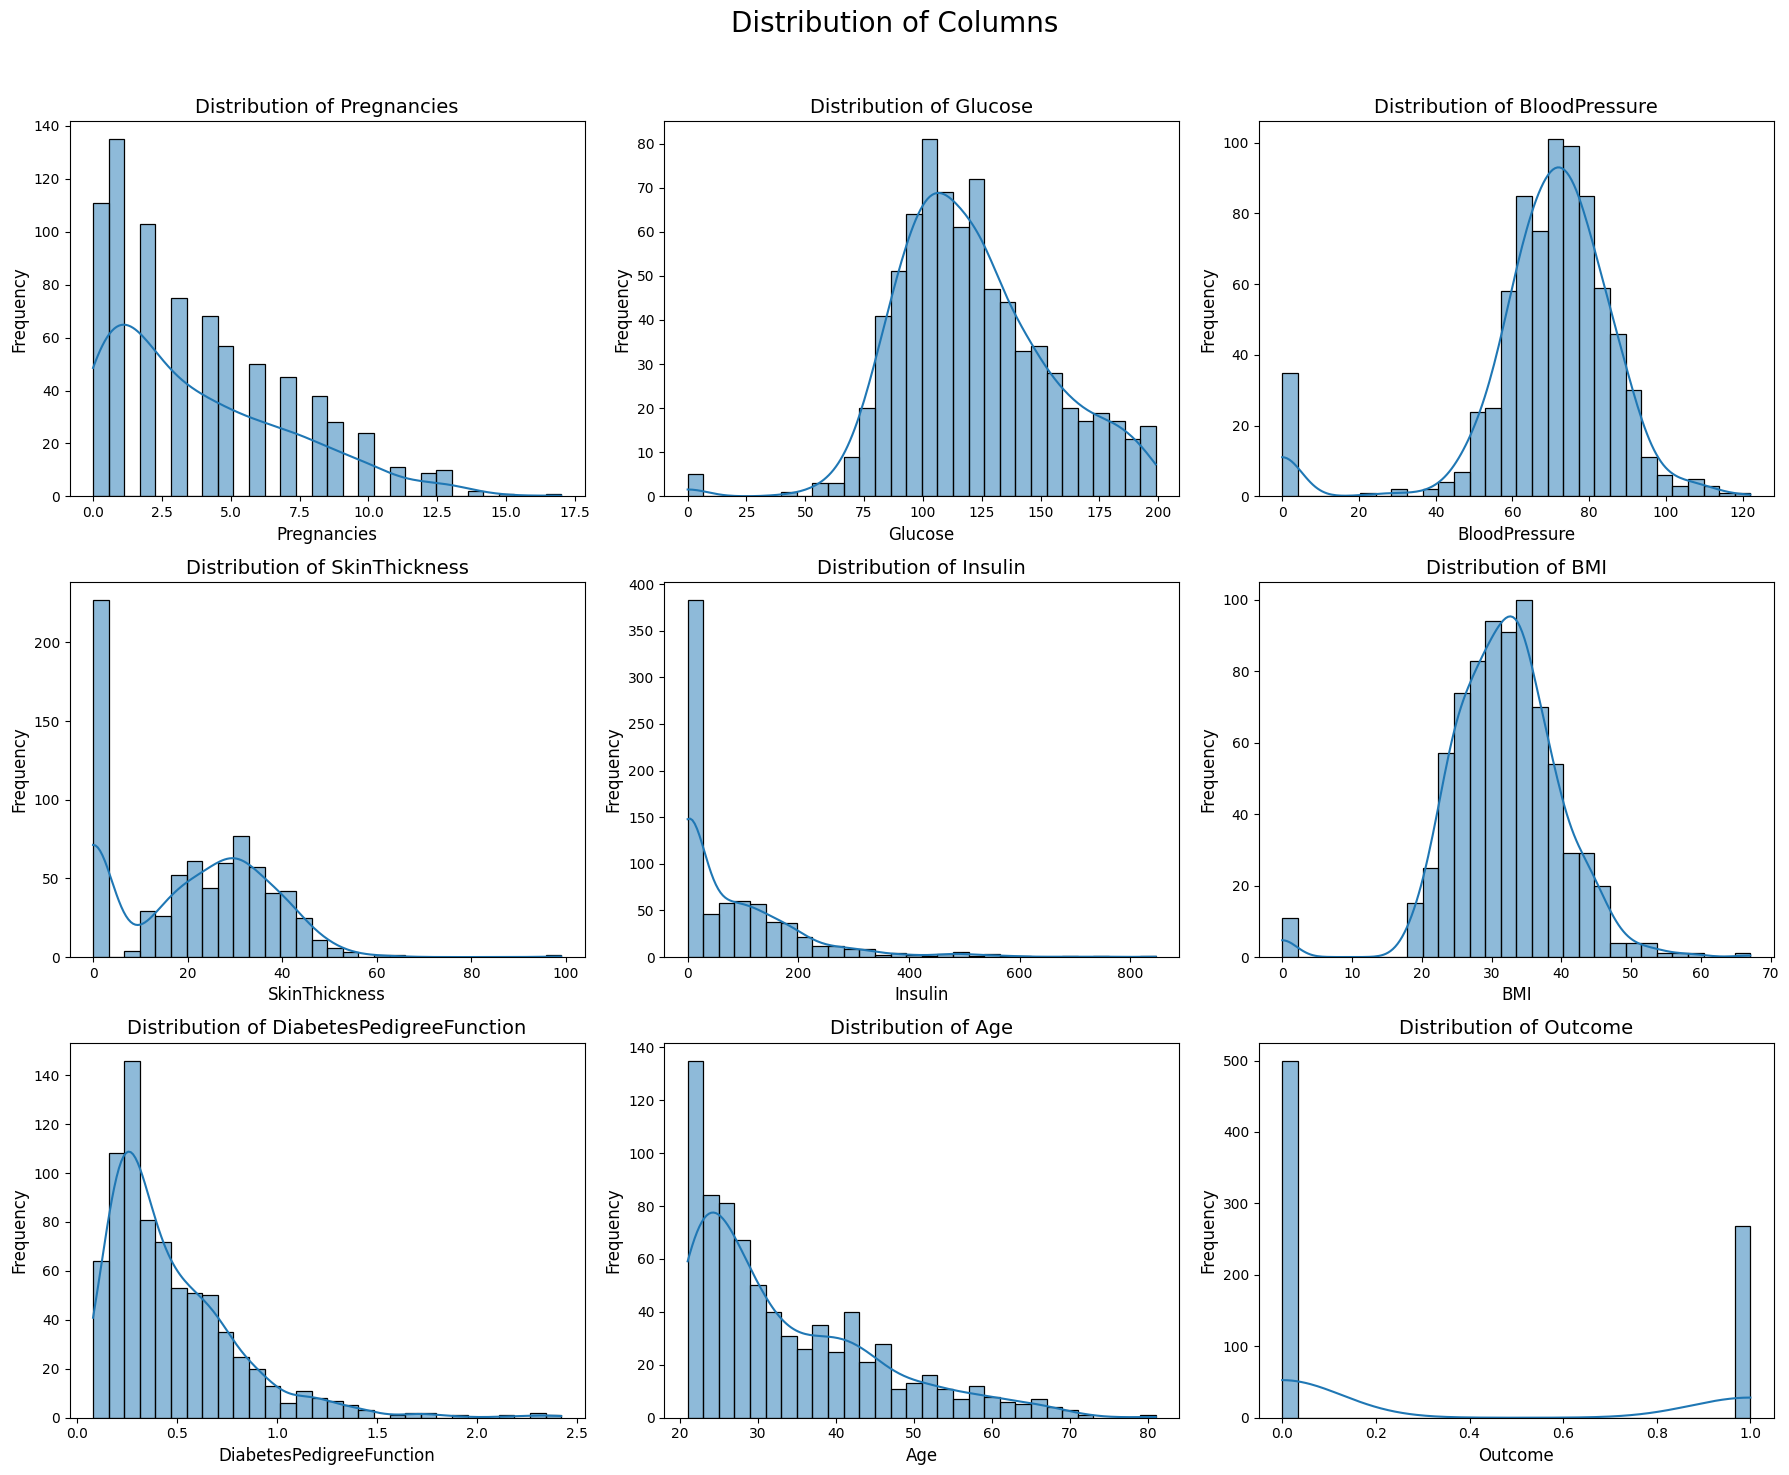

In [14]:
# to plot in one single figure

import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define the number of columns in the DataFrame
num_columns = len(df.columns)

# Calculate the number of rows and columns for subplots (adjust if necessary)
rows = math.ceil(num_columns / 3)  # Adjust to fit in rows and columns
cols = 3  # 3 columns in each row

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
fig.suptitle("Distribution of Columns", fontsize=20)  # Main title

# Flatten axes array for easy iteration (in case rows * cols > num_columns)
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap with title
plt.show()


In [15]:
# now , we need to do the imputation for each column

'''
Pregnancies --> use median (bcoz, it's right skewed)
Glucose --> use mean (bcoz, it's symmetric)
BloodPressure --> use mean (bcoz, it's symmetric)
SkinThickness --> use median (bcoz, it' has outlier)
Insulin --> use median (bcoz, it's right skewed)
BMI --> use mean (bcoz, it's symmetric)
DiabetesPedigreeFunction --> use median (bcoz, it's right skewed)
Age --> use median (bcoz, it's right skewed)
'''

# replace 0 in every column with these values

df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, df['DiabetesPedigreeFunction'].median())
df['Age'] = df['Age'].replace(0, df['Age'].median())

In [16]:
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0             6    148.0      72.000000             35     30.5  33.600000   
1             1     85.0      66.000000             29     30.5  26.600000   
2             8    183.0      64.000000             23     30.5  23.300000   
3             1     89.0      66.000000             23     94.0  28.100000   
4             3    137.0      40.000000             35    168.0  43.100000   
5             5    116.0      74.000000             23     30.5  25.600000   
6             3     78.0      50.000000             32     88.0  31.000000   
7            10    115.0      69.105469             23     30.5  35.300000   
8             2    197.0      70.000000             45    543.0  30.500000   
9             8    125.0      96.000000             23     30.5  31.992578   
10            4    110.0      92.000000             23     30.5  37.600000   
11           10    168.0      74.000000             23     30.5  38.000000   
12           10    139.0      80.000000             23     30.5  27.100000   
13            1    189.0      60.000000             23    846.0  30.100000   
14            5    166.0      72.000000             19    175.0  25.800000   
15            7    100.0      69.105469             23     30.5  30.000000   
16            3    118.0      84.000000             47    230.0  45.800000   
17            7    107.0      74.000000             23     30.5  29.600000   
18            1    103.0      30.000000             38     83.0  43.300000   
19            1    115.0      70.000000             30     96.0  34.600000   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [17]:
# let's check whether 0 is present is columns or not

for i in df.columns:
 print(df[df[i] == 0].shape) # ignore last column, it's target column

(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(500, 9)


In [18]:
# let's see the correlation map

df.corr()
# none of the pairs have correlation high (>0.8).
# we need to consider all the features

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.148929       0.246388       0.060706   
Glucose                      0.148929  1.000000       0.219666       0.172361   
BloodPressure                0.246388  0.219666       1.000000       0.152458   
SkinThickness                0.060706  0.172361       0.152458       1.000000   
Insulin                     -0.059580  0.357081      -0.022049       0.238188   
BMI                          0.080538  0.231478       0.281231       0.546958   
DiabetesPedigreeFunction    -0.016151  0.137106       0.000371       0.142977   
Age                          0.538169  0.266600       0.326740       0.054514   
Outcome                      0.245466  0.492908       0.162986       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.059580  0.080538                 -0.016151   
Glucose                   0.357081  0.231478                  0.137106   
BloodPressure            -0.022049  0.281231                  0.000371   
SkinThickness             0.238188  0.546958                  0.142977   
Insulin                   1.000000  0.189031                  0.178029   
BMI                       0.189031  1.000000                  0.153508   
DiabetesPedigreeFunction  0.178029  0.153508                  1.000000   
Age                      -0.015413  0.025748                  0.033561   
Outcome                   0.148457  0.312254                  0.173844   

                               Age   Outcome  
Pregnancies               0.538169  0.245466  
Glucose                   0.266600  0.492908  
BloodPressure             0.326740  0.162986  
SkinThickness             0.054514  0.189065  
Insulin                  -0.015413  0.148457  
BMI                       0.025748  0.312254  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

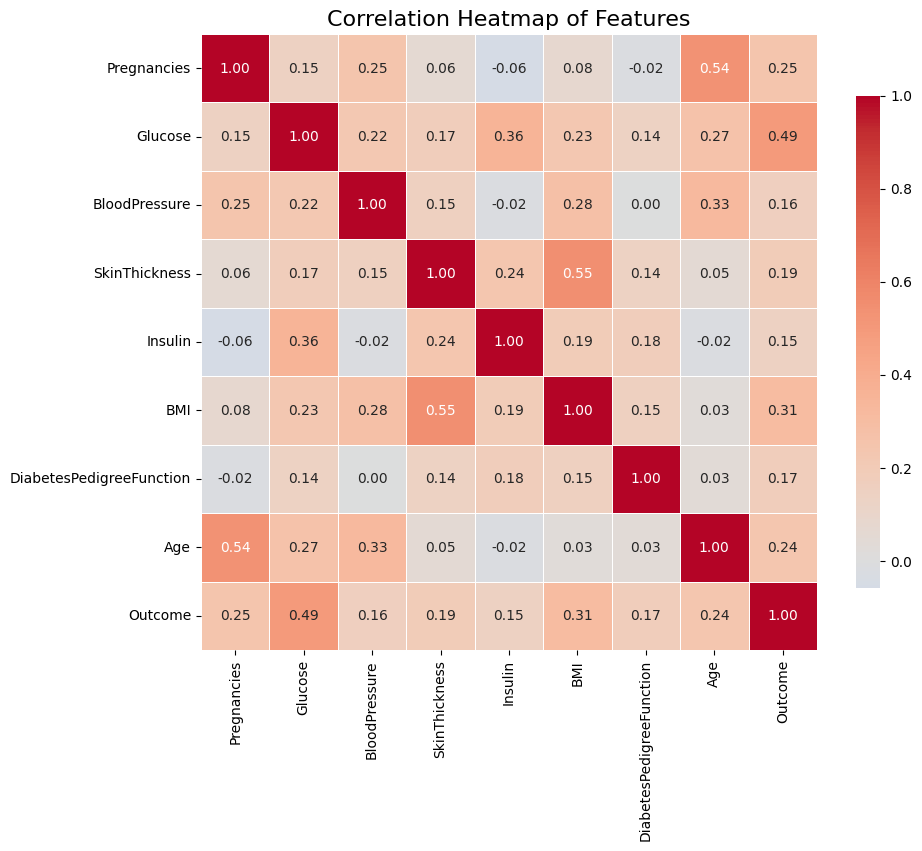

In [19]:
# heatmap

corr = df.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations for clarity
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, square=True, cbar_kws={"shrink": .8})

# Add a title for context
plt.title("Correlation Heatmap of Features", fontsize=16)

plt.show()

In [ ]:
#When using KNN, removing redundant features is necessary because
# Redundant features can exacerbate dimensionality problem by adding unnecessary dimensions without providing additional information.
# If you have highly correlated features, they contribute similar information to the distance calculation, which can lead to ineffective neighbor search
# A simpler model can also generalize better to unseen data, as it is less likely to overfit
# Fewer features mean fewer calculations during the KNN search process, leading to faster query times. This is particularly important if you have a large dataset.

In [20]:
# split the df into features and target
features=df.drop('Outcome', axis=1)
target=df['Outcome']

<Axes: >

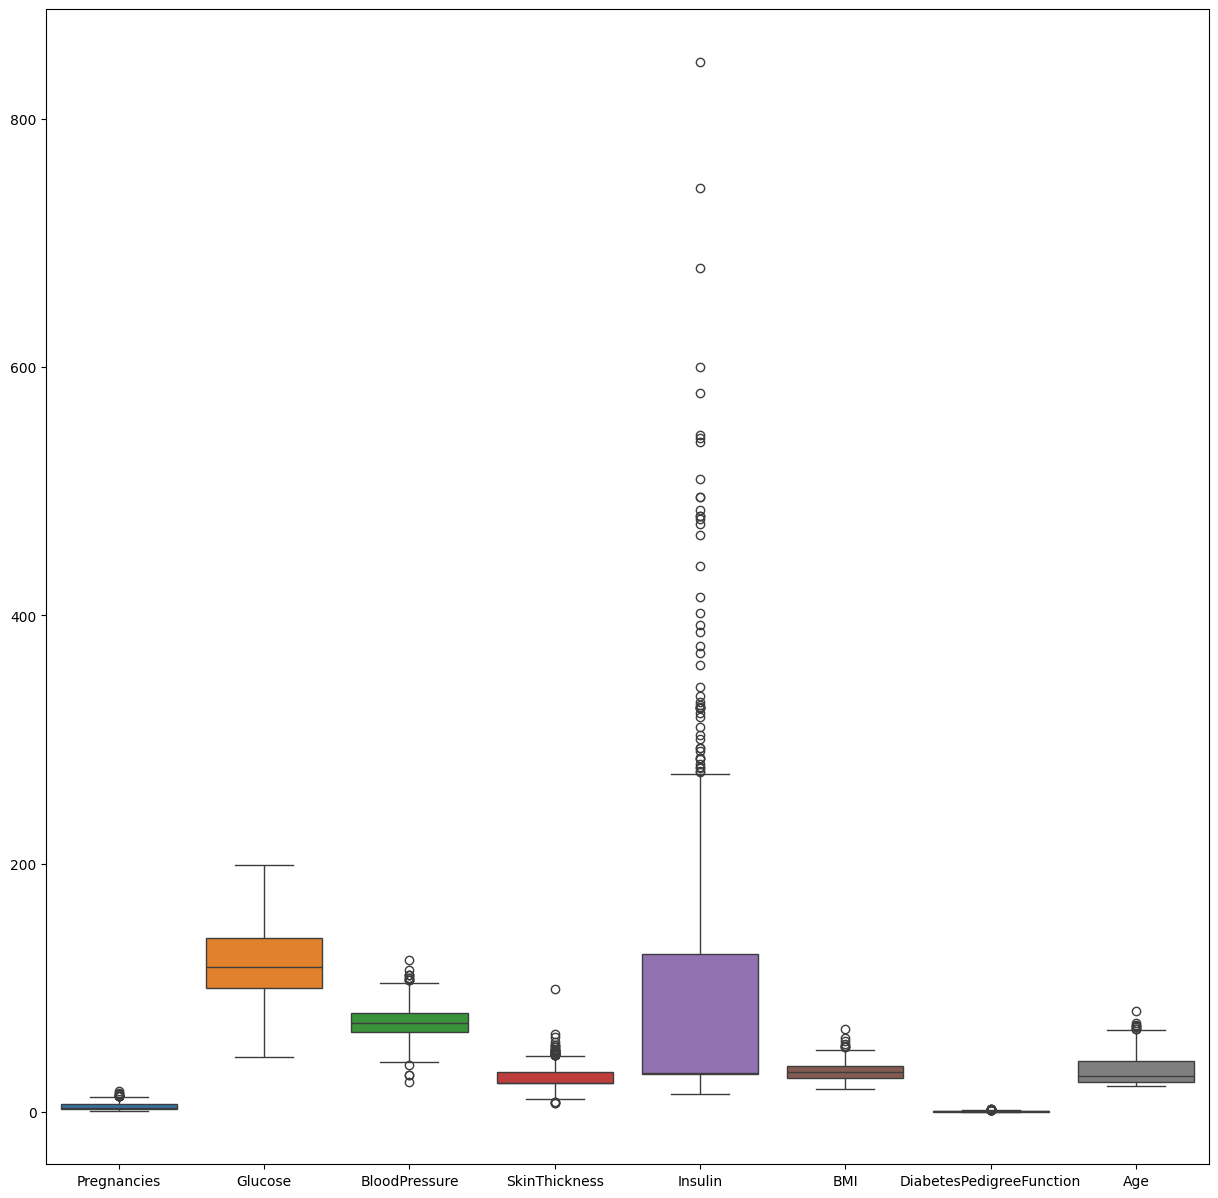

In [21]:
# Outliers detection by box plot

fig, axes = plt.subplots(figsize=(15, 15))
sns.boxplot(data=features, ax=axes)

In [22]:
# In each column, we need to handle the outliers.
# let's remove them

for column in features.columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Option 1: Remove outliers
        mask = (features[column] >= lower_bound) & (features[column] <= upper_bound)

        # Option 2: Clip outliers
        # df[column] = np.clip(df[column], lower_bound, upper_bound)

        # Option 3: Apply transformation to reduce outlier impact (e.g., log transform)
        # df[column] = np.log1p(df[column])  # log1p handles zero values well




# if you use the first method and remove outliers from a specific column (say, column-1), any rows containing those outliers will be completely removed from the DataFrame.
#This means that all other values in those rows, across all columns, will also be removed. This approach could lead to the loss of valuable data
# from other columns if rows are removed due to outliers in only one column.

#If you want to handle outliers on a per-column basis without dropping entire rows, you could:
# 1. Replace outlier values with NaN and later use imputation (like filling in with mean/median).
# 2. Clip only the outlier values to acceptable bounds without removing the whole row.


In [23]:
features=features[mask]
target=target[mask]

In [24]:
features.shape

(759, 8)

In [25]:
features.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   759.000000  759.000000     759.000000     759.000000  759.000000   
mean      4.266140  121.604048      72.206306      27.379447   95.374177   
std       3.026758   30.357286      12.154978       9.265700  105.957665   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.500000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   36.000000   
75%       6.000000  140.000000      80.000000      32.000000  129.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  759.000000                759.000000  759.000000  
mean    32.494764                  0.471219   32.805007  
std      6.873584                  0.332522   11.113182  
min     18.200000                  0.078000   21.000000  
25%     27.600000                  0.243500   24.000000  
50%     32.000000                  0.370000   29.000000  
75%     36.600000                  0.625000   40.000000  
max     67.100000                  2.420000   66.000000

In [26]:
# Now, we need to normalize the values (to keep all column's values on same scale)

from sklearn.preprocessing import StandardScaler
# mean=0 and SD=1
scaler=StandardScaler()
features=scaler.fit_transform(features)

In [27]:

features_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
features=pd.DataFrame(features,columns=features_names) # we need to add col names bcoz the features here is Series
features.describe()

# we see here that mean=0 and SD=1

Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.590000e+02  7.590000e+02   7.590000e+02   7.590000e+02  7.590000e+02   
mean   1.029772e-16 -3.978665e-17  -3.042508e-17  -1.509552e-16 -4.329724e-17   
std    1.000659e+00  1.000659e+00   1.000659e+00   1.000659e+00  1.000659e+00   
min   -1.079800e+00 -2.558042e+00  -3.968588e+00  -2.200901e+00 -7.684941e-01   
25%   -7.491956e-01 -7.286101e-01  -6.755847e-01  -4.729631e-01 -6.126688e-01   
50%   -4.185912e-01 -1.517621e-01  -1.698412e-02  -4.729631e-01 -5.607270e-01   
75%    5.732217e-01  6.063810e-01   6.416165e-01   4.990017e-01  3.222827e-01   
max    4.209869e+00  2.551183e+00   4.099270e+00   7.734740e+00  7.088876e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  7.590000e+02              7.590000e+02  7.590000e+02  
mean   5.546727e-16              4.914821e-17  1.591466e-16  
std    1.000659e+00              1.000659e+00  1.000659e+00  
min   -2.081038e+00             -1.183313e+00 -1.062953e+00  
25%   -7.125819e-01             -6.852739e-01 -7.928253e-01  
50%   -7.202795e-02             -3.045975e-01 -3.426125e-01  
75%    5.976421e-01              4.627740e-01  6.478556e-01  
max    5.037846e+00              5.864467e+00  2.988962e+00

In [28]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<Axes: >

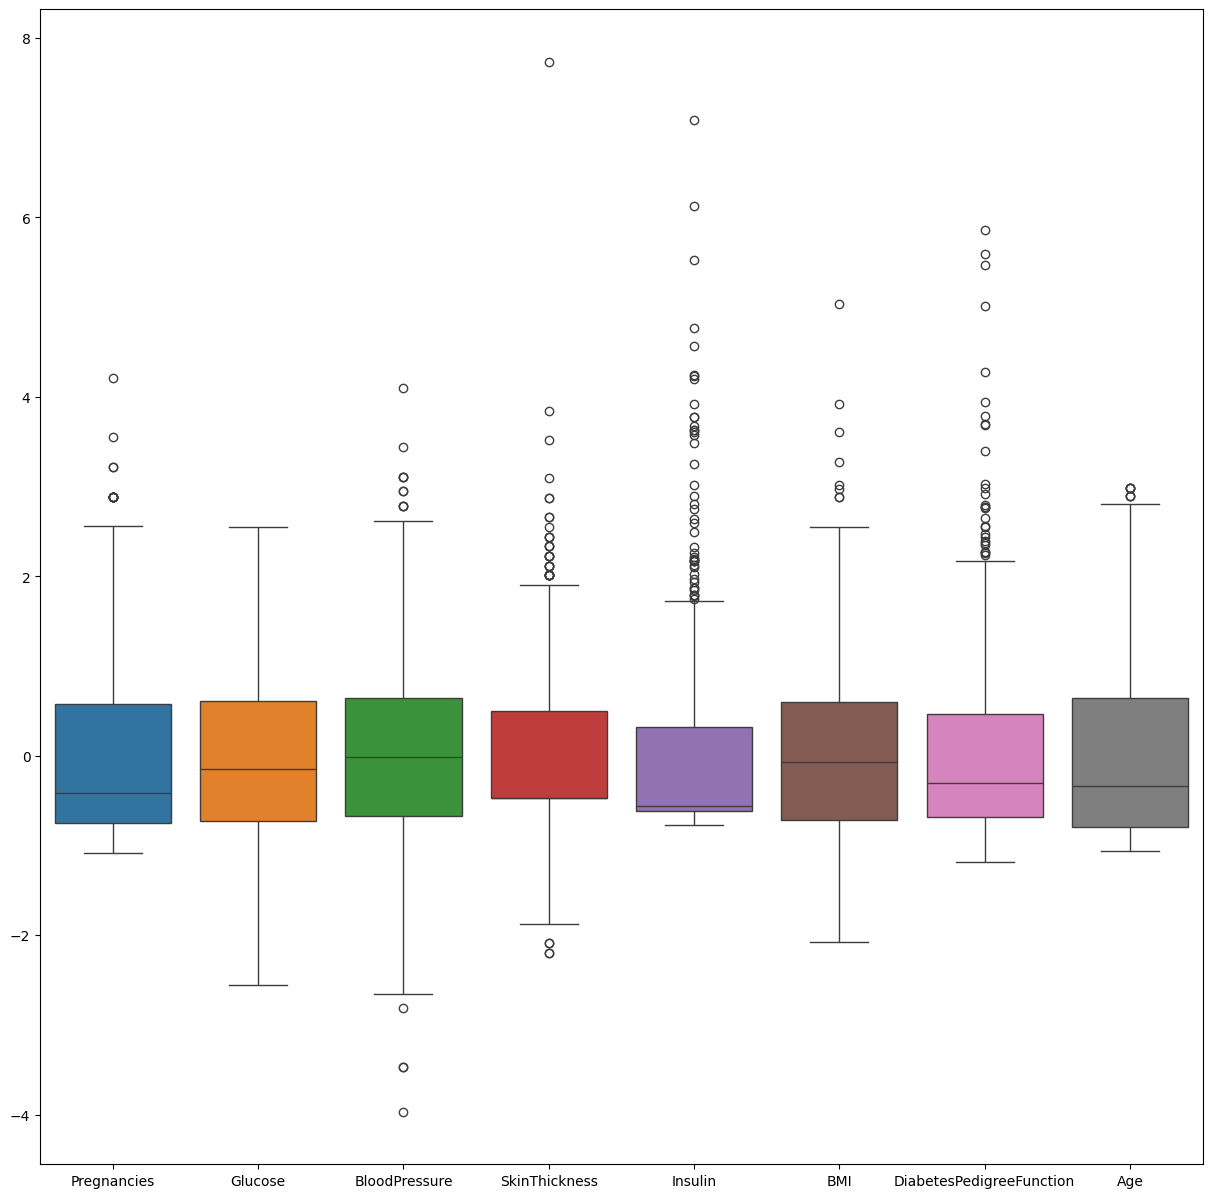

In [29]:
# let's plot the box plot again --> each has similar range of values

fig, axes = plt.subplots(figsize=(15, 15))
sns.boxplot(data=features, ax=axes)

# again, we have some outliers

In [30]:
# we can further remove the outliers by considering only 95 percentage of data

'''
The 68-95-99.7 rule, also known as the empirical rule, is a guideline in statistics that describes how data is distributed in a normal distribution. It states that:

68% of the data falls within 1 standard deviation of the mean.
95% of the data falls within 2 standard deviations of the mean.
99.7% of the data falls within 3 standard deviations of the mean.
'''

# For each numerical column, apply the outlier removal
for column in features.columns:
        # the lower and upper bounds of the desired percentile range
        # Calculate the 1st and 95th percentiles
        lower_bound = features[column].quantile(0.01)
        upper_bound = features[column].quantile(0.9)

        #  Remove data points that fall below the lower bound or above the upper bound.
        mask = (features[column] >= lower_bound) & (features[column] <= upper_bound)



In [31]:
features.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)
features = features[mask]
target = target[mask]

In [32]:
features.shape # the data is again reduced

(687, 8)

In [33]:
target.shape

(687,)

<Axes: >

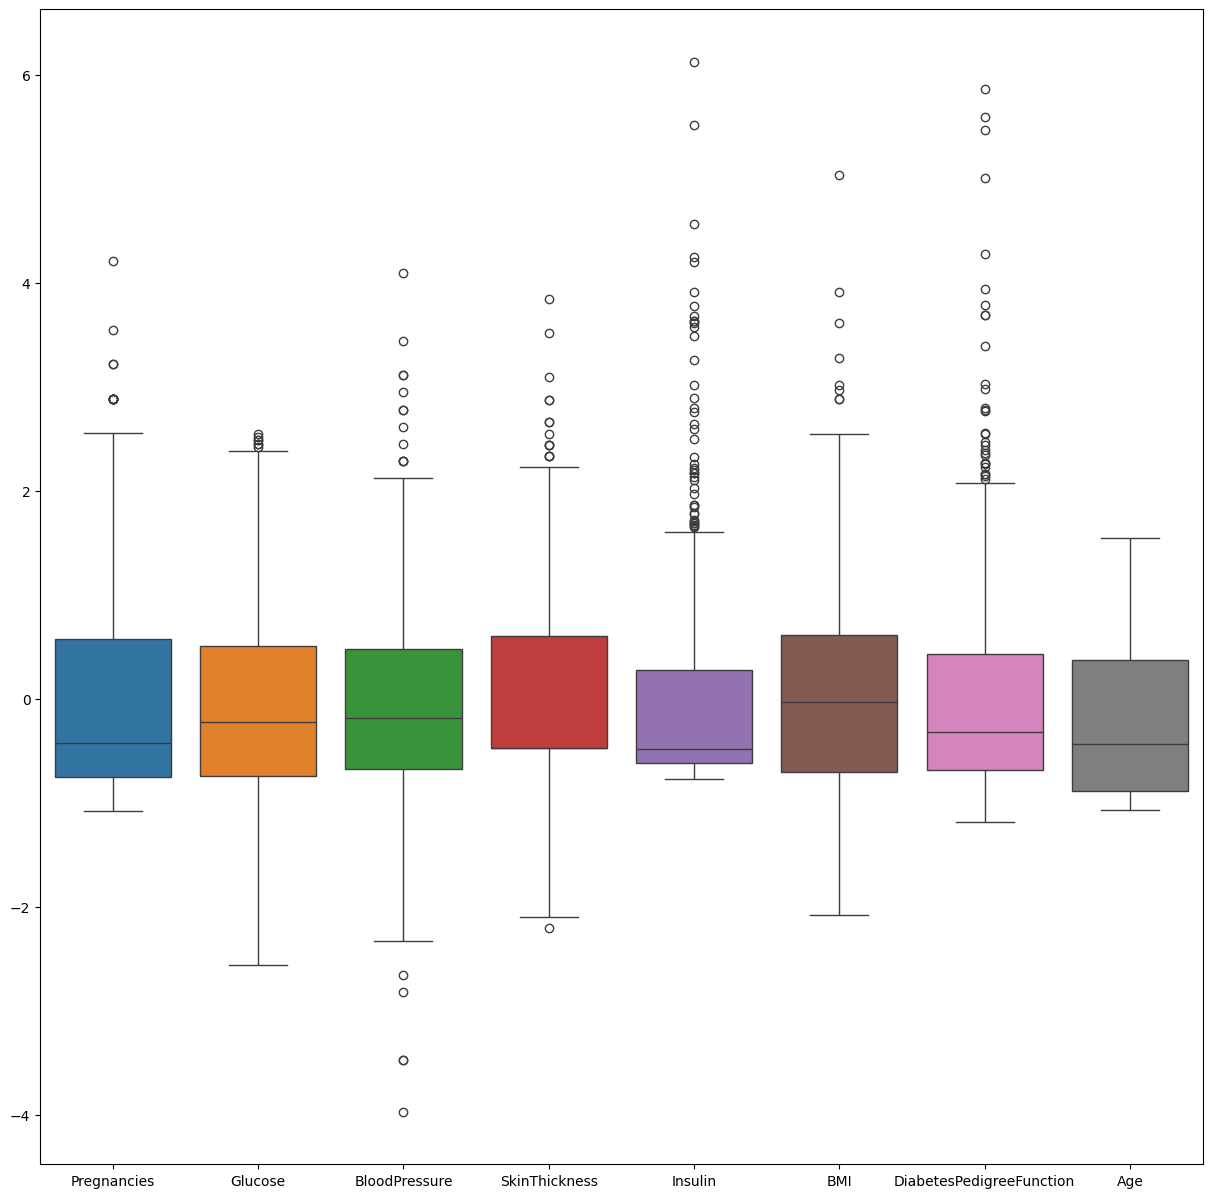

In [34]:
# let's plot the box plot again

fig, axes = plt.subplots(figsize=(15, 15))
sns.boxplot(data=features, ax=axes)

In [35]:
# also here ,we have imbalanced data

target.value_counts()

#(target-0 has 457 data points  and target-1 has 230 data points)
# this happens alot especially in medical domain where people who got disease are less.

Outcome
0    457
1    230
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.33, random_state=42)


In [37]:
x_train.shape

(460, 8)

In [38]:
x_test.shape

(227, 8)

In [39]:
y_train.value_counts() # there is data imbalance

Outcome
0    305
1    155
Name: count, dtype: int64

In [40]:
# to overcome the class imbalance, there are many techniques
# 1.oversampling -->  increasing the number of instances of the minority class
# 2.undersampling --> reducing the number of instances of the majority class
# 3.SMOTE (Synthetic Minority Over-sampling Technique, type of oversampling), which creates synthetic samples rather than simply duplicating existing ones



# let's apply SMOTE technique

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [41]:
y_train_resampled.value_counts() # now, we have balanced data

Outcome
0    305
1    305
Name: count, dtype: int64

In [42]:
# Model training

from sklearn.neighbors import KNeighborsClassifier
classification=KNeighborsClassifier(n_neighbors=5) # K=5
classification.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [47]:
# Get parameters of the KNN model
knn=classification
params = {
    "n_neighbors": knn.n_neighbors,
    "weights": knn.weights,
    "algorithm": knn.algorithm,
    "leaf_size": knn.leaf_size,
    "metric": knn.metric,
    "p": knn.p,
    "metric_params": knn.metric_params,
}
for param, value in params.items():
    print(f"{param}: {value}")

n_neighbors: 5
weights: uniform
algorithm: auto
leaf_size: 30
metric: minkowski
p: 2
metric_params: None


In [44]:
target_pred=classification.predict(x_test)

In [45]:
target_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0])

In [48]:
#Evaluation Metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc=accuracy_score(y_test,target_pred)
print("Accuracy Score: ",acc)

target_names=['No Diabetes', 'Diabetes']
print('\n\n',classification_report(y_test, target_pred, target_names=target_names))

Accuracy Score:  0.7444933920704846


               precision    recall  f1-score   support

 No Diabetes       0.83      0.78      0.80       152
    Diabetes       0.60      0.67      0.63        75

    accuracy                           0.74       227
   macro avg       0.71      0.72      0.72       227
weighted avg       0.75      0.74      0.75       227



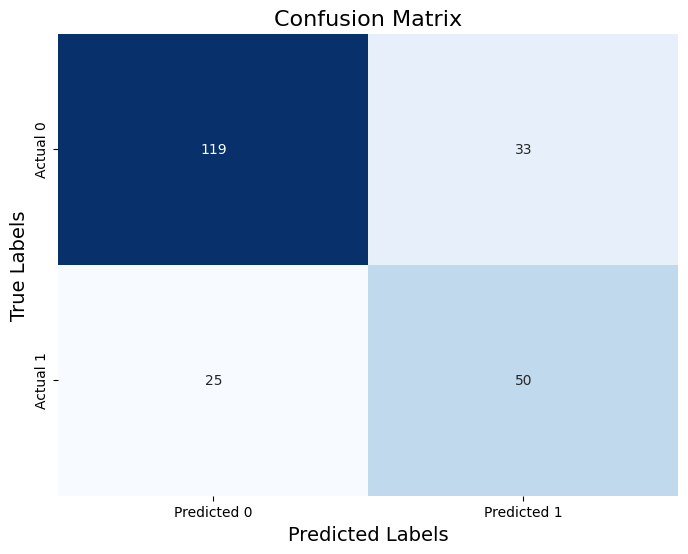

In [49]:
# confusion matrix

cm = confusion_matrix(y_test, target_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

In [ ]:
# save the model

import pickle

pickle.dump(classification, open('model.pkl', 'wb'))

In [ ]:
# open the model to do further predictions
classification_model=pickle.load(open('model.pkl', 'rb'))

### For Regression , use the KNeighborsRegressor from sklearn.neighbors